In [29]:
#
# Notebook made by Andre A. Goncalves
# Registro
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Getting the wind and solar energy data
wind_df = pd.read_csv('wind-generation.csv')
solar_df = pd.read_csv('solar-energy-consumption.csv')

# Getting the available countries given by the dataset
wind_available_regions = set(wind_df['Entity'])
solar_available_regions = set(solar_df['Entity'])

wind_df, solar_df

(             Entity Code  Year  Electricity from wind (TWh)
 0     ASEAN (Ember)  NaN  2000                          0.0
 1     ASEAN (Ember)  NaN  2001                          0.0
 2     ASEAN (Ember)  NaN  2002                          0.0
 3     ASEAN (Ember)  NaN  2003                          0.0
 4     ASEAN (Ember)  NaN  2004                          0.0
 ...             ...  ...   ...                          ...
 7991       Zimbabwe  ZWE  2017                          0.0
 7992       Zimbabwe  ZWE  2018                          0.0
 7993       Zimbabwe  ZWE  2019                          0.0
 7994       Zimbabwe  ZWE  2020                          0.0
 7995       Zimbabwe  ZWE  2021                          0.0
 
 [7996 rows x 4 columns],
              Entity Code  Year  Electricity from solar (TWh)
 0     ASEAN (Ember)  NaN  2000                          0.00
 1     ASEAN (Ember)  NaN  2001                          0.00
 2     ASEAN (Ember)  NaN  2002                       

In [31]:
wind_df = wind_df[wind_df['Year'] >= 2000]
solar_df = solar_df[solar_df['Year'] >= 2000]
wind_df, solar_df

(             Entity Code  Year  Electricity from wind (TWh)
 0     ASEAN (Ember)  NaN  2000                          0.0
 1     ASEAN (Ember)  NaN  2001                          0.0
 2     ASEAN (Ember)  NaN  2002                          0.0
 3     ASEAN (Ember)  NaN  2003                          0.0
 4     ASEAN (Ember)  NaN  2004                          0.0
 ...             ...  ...   ...                          ...
 7991       Zimbabwe  ZWE  2017                          0.0
 7992       Zimbabwe  ZWE  2018                          0.0
 7993       Zimbabwe  ZWE  2019                          0.0
 7994       Zimbabwe  ZWE  2020                          0.0
 7995       Zimbabwe  ZWE  2021                          0.0
 
 [5591 rows x 4 columns],
              Entity Code  Year  Electricity from solar (TWh)
 0     ASEAN (Ember)  NaN  2000                          0.00
 1     ASEAN (Ember)  NaN  2001                          0.00
 2     ASEAN (Ember)  NaN  2002                       

In [32]:
# Some countries have more data beyond 2000, but we will consider only the recent ones
whole_time_period = range(2000, 2023)

In [33]:
# Getting data from the countries that passed the initial filter for the measure 
countries = ['Argentina', 'Brazil', 'Canada', 'France', 'Germany', 'India',
             'Italy', 'Mexico', 'Turkey', 'United Kingdom', 'United States']
for country in countries:
    if not (country in wind_available_regions):
        print(country, ' is not in the wind dataset')
    if not (country in solar_available_regions):
        print(country, ' is not in the solar dataset')

In [34]:
# Filtering the dataset for the time period wanted
wind_dts = {country:list((wind_df[wind_df['Entity'] == country])['Electricity from wind (TWh)']) for country in countries}
solar_dts = {country:list((solar_df[solar_df['Entity'] == country])['Electricity from solar (TWh)']) for country in countries}
wind_dts, solar_dts

({'Argentina': [0.04,
   0.05,
   0.07,
   0.08,
   0.07,
   0.08,
   0.07,
   0.06,
   0.04,
   0.04,
   0.03,
   0.06,
   0.82,
   1.01,
   0.62,
   0.59,
   0.54,
   0.61,
   1.4,
   4.95,
   9.32,
   12.81,
   14.02],
  'Brazil': [0.0,
   0.04,
   0.06,
   0.06,
   0.06,
   0.09,
   0.24,
   0.64,
   0.84,
   1.24,
   2.18,
   2.7,
   5.05,
   6.58,
   12.21,
   21.47,
   33.24,
   42.06,
   48.12,
   55.43,
   56.48,
   71.5,
   80.0],
  'Canada': [0.26,
   0.34,
   0.41,
   0.83,
   0.95,
   1.57,
   2.47,
   3.01,
   3.79,
   6.64,
   8.64,
   10.09,
   11.2,
   17.78,
   22.32,
   26.7,
   30.62,
   31.2,
   32.85,
   32.33,
   35.74,
   35.21,
   38.13],
  'France': [0.05,
   0.13,
   0.27,
   0.39,
   0.59,
   0.96,
   2.18,
   4.07,
   5.69,
   7.91,
   9.94,
   12.37,
   15.18,
   16.13,
   17.32,
   21.42,
   21.38,
   24.61,
   28.6,
   34.72,
   39.86,
   36.83,
   38.46],
  'Germany': [9.35,
   10.46,
   15.86,
   19.09,
   26.02,
   27.77,
   31.32,
   40.51,
   41.38,

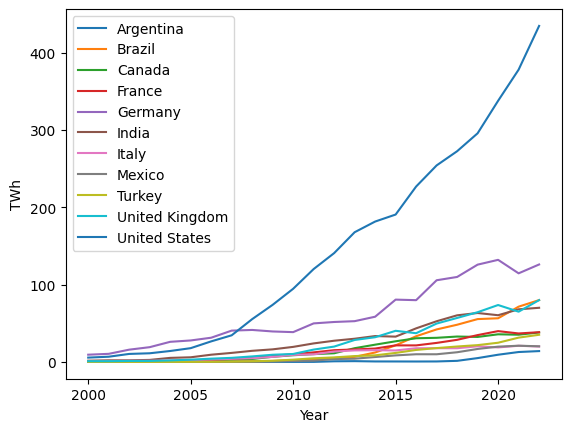

In [35]:
# Plot graph for the wind generated energy of the selected countries in the considered time period
for country in countries:
    plt.plot(whole_time_period, wind_dts[country], label=country)
plt.xlabel('Year')
plt.ylabel('TWh')
plt.legend()
plt.show()

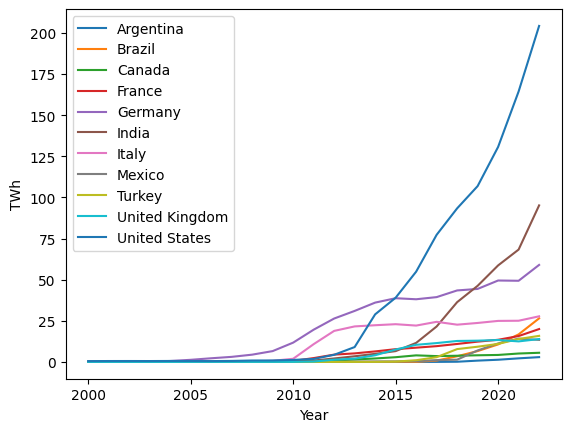

In [36]:
# Plot graph for the solar PV generated energy of the selected countries in the considered time period
for country in countries:
    plt.plot(whole_time_period, solar_dts[country], label=country)
plt.xlabel('Year')
plt.ylabel('TWh')
plt.legend()
plt.show()

In [37]:
# The np.polyfit() method returns the coeficients of the polynomial in an np.array
# the following function evaluates the polynomial for a given "x" value
def evaluate_polynomial(polynomial, x):
    y = 0
    x_factor = 1
    for coef in polynomial[::-1]:
        y += coef*x_factor
        x_factor *= x
    return y        

In [39]:
# This function makes the regression polynomial for a country and a given degree,
# start_year refers to the first year to start the polynomial optimization and
# wind is a bool that refers to wind or solar pv consideration
def make_p_regressor(country = 'Brazil', start_year = 2000, degree = 1, wind=True):
    if wind:
        dts = wind_dts
    else:
        dts = solar_dts
    start_year = max(min(start_year, 2022), 2000)
    X = np.array(range(start_year, 2023))
    Y = np.array(dts[country][start_year - 2000:])
    polynomial = np.polyfit(X, Y, degree)
    return polynomial

In [38]:
# This function makes the projections for a specific group of countries
def make_projections(start_year=2000, degree = 1, countries = countries, wind=True):
    projections = {}
    for country in countries:
        projections[country] = make_p_regressor(country=country, start_year=start_year, degree=degree, wind=wind)
    return projections        

In [40]:
# This function plots the projections for future and past years
def plot_projections(start_year=2000, countries = countries, degree = 1, wind=True, legend = True):
    projections = make_projections(start_year=start_year, degree = degree, wind=wind)
    X = np.array(range(2000, 2023))
    if wind:
        dts = wind_dts
    else:
        dts = solar_dts
    for country in countries:
        plt.plot(X, dts[country], label=country)
        plt.plot(range(start_year, 2031), [evaluate_polynomial(projections[country], year)
                                                  for year in range(start_year, 2031)], color='black',
                                                  linestyle = 'dashed')
    plt.xlabel('Year')
    plt.ylabel('TWh')
    if legend:
        plt.legend(loc=0)

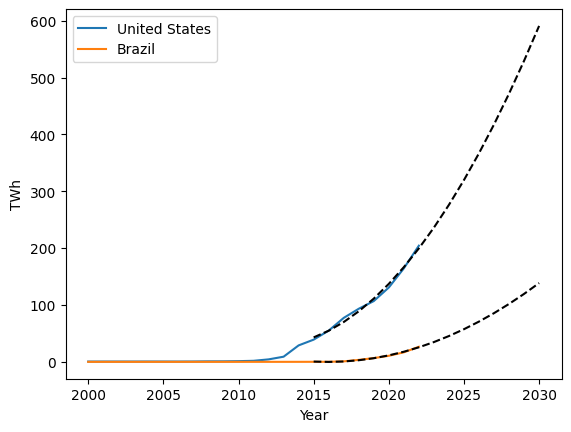

In [41]:
# The regresison should be of degree two to avoid Runge fenomenon and to better represent curvature (non linearity)
plot_projections(start_year=2015, countries = ['United States', 'Brazil'], degree=2, wind=False)
plt.show()

In [42]:
# The following dictionary gives the information of the best start year for the energy production projections
# It is not ideal to consider the same start year for every country and energy type, because they have
# intrinsically distinct growth curves, so that an specific analysis is required
start_year = {}
start_year['Argentina'] =  {'wind':2015, 'solar':2015}
start_year['Brazil'] =  {'wind':2015, 'solar':2015}
start_year['Canada'] =  {'wind':2015, 'solar':2015}
start_year['France'] =  {'wind':2010, 'solar':2010}
start_year['Germany'] =  {'wind':2000, 'solar':2015}
start_year['India'] =  {'wind':2005, 'solar':2015}
start_year['Italy'] =  {'wind':2004, 'solar':2012}
start_year['Mexico'] =  {'wind':2005, 'solar':2015}
start_year['Turkey'] =  {'wind':2005, 'solar':2015}
start_year['United Kingdom'] =  {'wind':2005, 'solar':2008}
start_year['United States'] =  {'wind':2010, 'solar':2010}

Wind energy generated in 2030 prediction:
Argentina: 71.74 TWh
Brazil: 141.5 TWh
Canada: 43.38 TWh
France: 70.34 TWh
Germany: 228.39 TWh
India: 124.37 TWh
Italy: 23.03 TWh
Mexico: 49.74 TWh
Turkey: 74.84 TWh
United Kingdom: 153.01 TWh
United States: 809.25 TWh


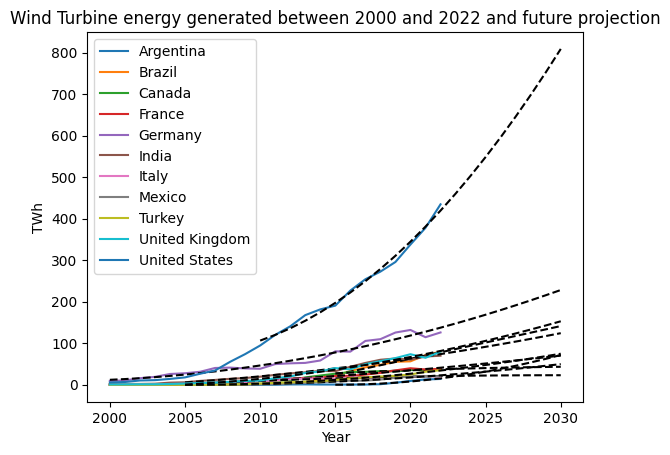

In [43]:
print('Wind energy generated in 2030 prediction:')
for country in countries:
    projection = make_projections(start_year = start_year[country]['wind'], countries = [country], degree = 2, wind=True)[country]
    energy = evaluate_polynomial(projection, 2030)
    print(f'{country}: {round(energy, 2)} TWh')
    plot_projections(start_year=start_year[country]['wind'], countries = [country], degree = 2, wind = True)
plt.title('Wind Turbine energy generated between 2000 and 2022 and future projection')
plt.show()

Solar energy generated in 2030 prediction:
Argentina: 16.44 TWh
Brazil: 138.54 TWh
Canada: 12.17 TWh
France: 35.68 TWh
Germany: 126.13 TWh
India: 288.04 TWh
Italy: 32.28 TWh
Mexico: 56.81 TWh
Turkey: 35.39 TWh
United Kingdom: 23.47 TWh
United States: 531.71 TWh


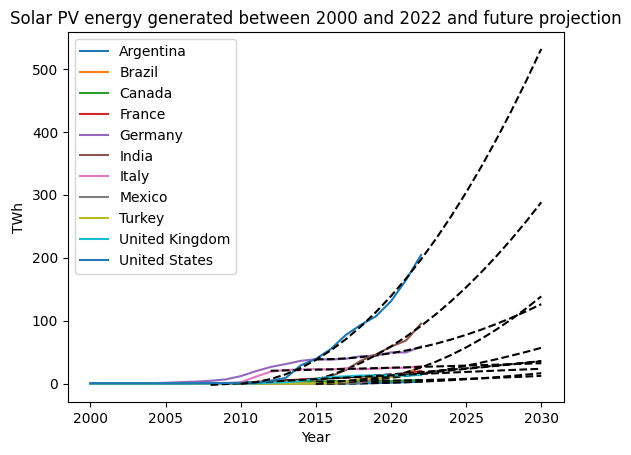

In [44]:
print('Solar energy generated in 2030 prediction:')
for country in countries:
    projection = make_projections(start_year = start_year[country]['solar'], countries = [country], degree = 2, wind=False)[country]
    energy = evaluate_polynomial(projection, 2030)
    print(f'{country}: {round(energy, 2)} TWh')
    plot_projections(start_year=start_year[country]['solar'], countries = [country], degree = 2, wind = False)
plt.title('Solar PV energy generated between 2000 and 2022 and future projection')
plt.show()

In [45]:
# Make the translation to portuguese in order to fit the challenge rules:

translator = {
    'Argentina': 'Argentina',
    'Brazil': 'Brasil',
    'Canada': 'Canadá',
    'France': 'França',
    'Germany': 'Alemanha',
    'India': 'Índia',
    'Italy': 'Itália',
    'Mexico': 'México',
    'Turkey': 'Turquia',
    'United Kingdom': 'Reino Unido',
    'United States': 'Estados Unidos'
}

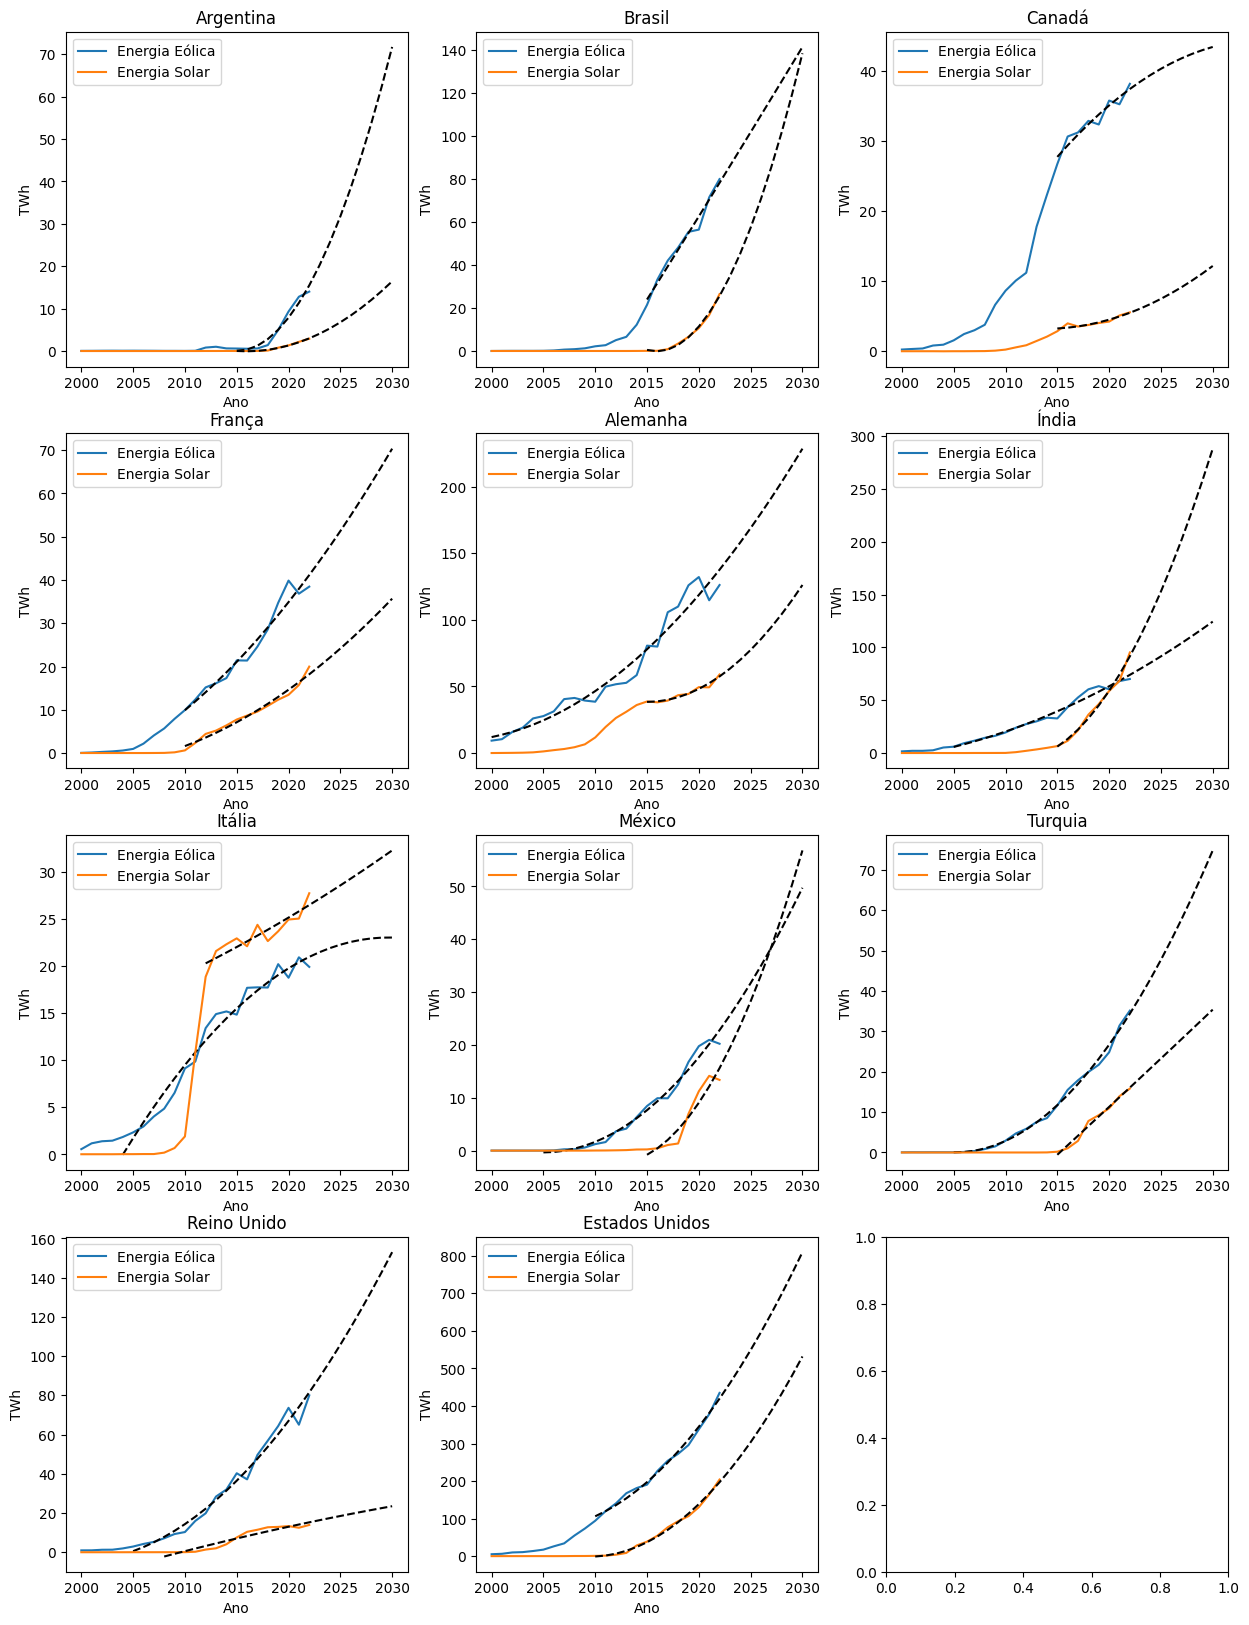

In [46]:
height, width = (4, 3)
fig, axs = plt.subplots(height, width)
X = np.array(range(2000, 2023))
for i, country in enumerate(countries):
    projection = make_projections(start_year = start_year[country]['wind'], countries = [country], degree = 2, wind=True)[country]
    axs[i//width][i - (i//width)*width].plot(X, wind_dts[country], label='Energia Eólica')
    axs[i//width][i - (i//width)*width].plot(range(start_year[country]['wind'], 2031), [evaluate_polynomial(projection, year)
                                            for year in range(start_year[country]['wind'], 2031)], color='black',
                                            linestyle = 'dashed')

    projection = make_projections(start_year = start_year[country]['solar'], countries = [country], degree = 2, wind=False)[country]
    axs[i//width][i - (i//width)*width].plot(X, solar_dts[country], label='Energia Solar')
    axs[i//width][i - (i//width)*width].plot(range(start_year[country]['solar'], 2031), [evaluate_polynomial(projection, year)
                                            for year in range(start_year[country]['solar'], 2031)], color='black',
                                            linestyle = 'dashed')
    axs[i//width][i - (i//width)*width].legend(loc=0)
    axs[i//width][i - (i//width)*width].set_title(translator[country])
    axs[i//width][i - (i//width)*width].set(xlabel = 'Ano', ylabel='TWh')
fig.set_figwidth(15)
fig.set_figheight(20)

# Remove the comentary for the following line if you want to save the figure (you can customize the parameters)
# plt.savefig('ProjectedData2030.png', dpi = 1200, format='png', transparent = False)

plt.show()